## The effect of memory layout

* [numpy arrays](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html#numpy-array) are, by default, organized in a row-major order. 
* Suppose the array `a=np.array(10,20)` is layed out in memory in a **row major**  order.
* `a[i,j]` and `a[i,j+1]` are placed in consecutive places in memory.
* `a[i,j]` and `a[i+1,j]` are 20 memory locations apart.
* This implies that scanning the array row by row is more local than scanning column by column.
* locality implies speed.

In [1]:
%pylab inline
from time import time

# create an n by n array
n=1000
a=ones([n,n])

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%time
# Scan column by column
s=0;
for i in range(n):
    s+=sum(a[:,i])


CPU times: user 12.2 ms, sys: 2.04 ms, total: 14.3 ms
Wall time: 12.1 ms


In [3]:
%%time
## Scan row by row
s=0;
for i in range(n):
    s+=sum(a[i,:])

CPU times: user 5.15 ms, sys: 1.77 ms, total: 6.92 ms
Wall time: 5.3 ms


## Some experiments with row vs column scanning
We want to see how the run time of these two code snippets varies as `n`, the size of the array, is changed.

In [9]:
def sample_run_times(T,k=10):
    """ compare the time to sum an array row by row vs column by column
        T: the sizes of the matrix, [10**e for e in T]
        k: the number of repetitions of each experiment
    """
    all_times=[]
    for e in T:
        n=int(10**e)
        #print('\r',n)
        a=np.ones([n,n])
        times=[]

        for i in range(k):    
            t0=time()
            s=0;
            for i in range(n):
                s+=sum(a[:,i])
            t1=time()
            s=0;
            for i in range(n):
                s+=sum(a[i,:])
            t2=time()
            times.append({'row minor':t1-t0,'row major':t2-t1})
        all_times.append({'n':n,'times':times})
    return all_times


In [10]:
#example run
sample_run_times([1,2],k=1)

[{'n': 10,
  'times': [{'row major': 3.62396240234375e-05,
    'row minor': 6.556510925292969e-05}]},
 {'n': 100,
  'times': [{'row major': 0.0003409385681152344,
    'row minor': 0.0003552436828613281}]}]

### Plot the ratio between run times as function of n
Here we have small steps between consecutive values of `n` and only one measurement for each (`k=1`)

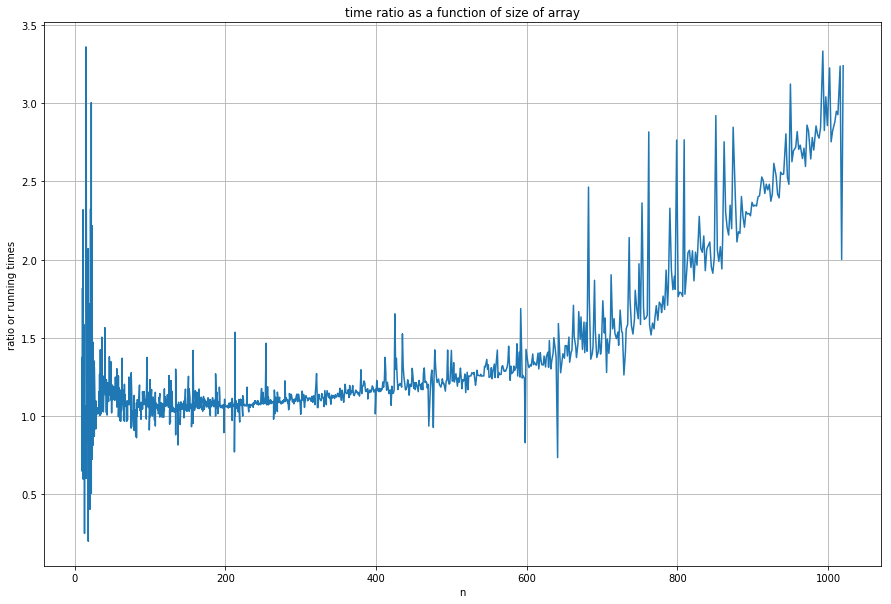

In [11]:
all_times=sample_run_times(np.arange(1,3.01,0.001),k=1)

n_list=[a['n'] for a in all_times]
ratios=[a['times'][0]['row minor']/a['times'][0]['row major'] for a in all_times]

figure(figsize=(15,10))
plot(n_list,ratios)
grid()
xlabel('n')
ylabel('ratio or running times')
title('time ratio as a function of size of array');

### Next, we want to quantify the random fluctuations
and see what is their source

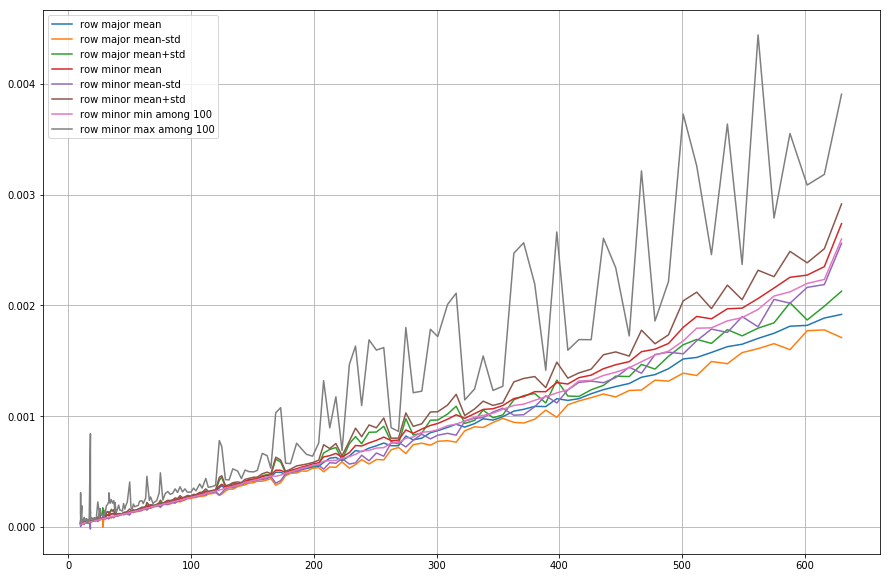

In [12]:
k=100
all_times=sample_run_times(np.arange(1,2.81,0.01),k=k)
_n=[]
_row_major_mean=[]
_row_major_std=[]
_row_major_std=[]
_row_minor_mean=[]
_row_minor_std=[]
_row_minor_min=[]
_row_minor_max=[]

for times in all_times:
    _n.append(times['n'])
    row_major=[a['row major'] for a in times['times']]
    row_minor=[a['row minor'] for a in times['times']]
    _row_major_mean.append(np.mean(row_major))
    _row_major_std.append(np.std(row_major))
    
    _row_minor_mean.append(np.mean(row_minor))
    _row_minor_std.append(np.std(row_minor))
    _row_minor_min.append(np.min(row_minor))
    _row_minor_max.append(np.max(row_minor))

_row_major_mean=np.array(_row_major_mean)
_row_major_std=np.array(_row_major_std)
_row_minor_mean=np.array(_row_minor_mean)
_row_minor_std=np.array(_row_minor_std)

figure(figsize=(15,10))
plot(_n,_row_major_mean,label='row major mean')
plot(_n,_row_major_mean-_row_major_std,label='row major mean-std')
plot(_n,_row_major_mean+_row_major_std,label='row major mean+std')
plot(_n,_row_minor_mean,label='row minor mean')
plot(_n,_row_minor_mean-_row_minor_std,label='row minor mean-std')
plot(_n,_row_minor_mean+_row_minor_std,label='row minor mean+std')
plot(_n,_row_minor_min,label='row minor min among %d'%k)
plot(_n,_row_minor_max,label='row minor max among %d'%k)
legend()
grid()


### Conclusions

1. Scan by column is slower than scan by row and the difference increases with the size.
2. scan by row increases linearly and has very little random fluctuations.
3. Scan by column increases linearly with one constant until about `n=430` and then increases with a higher constant.
4. Scan by column has large fluctatuations around the mean.